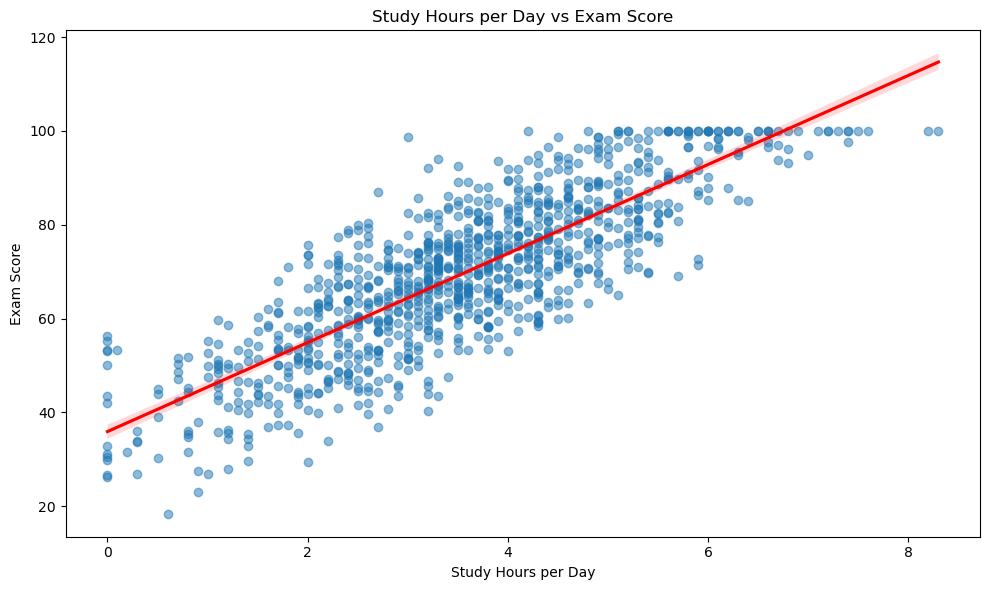

Correlation between study hours and exam score: 0.83



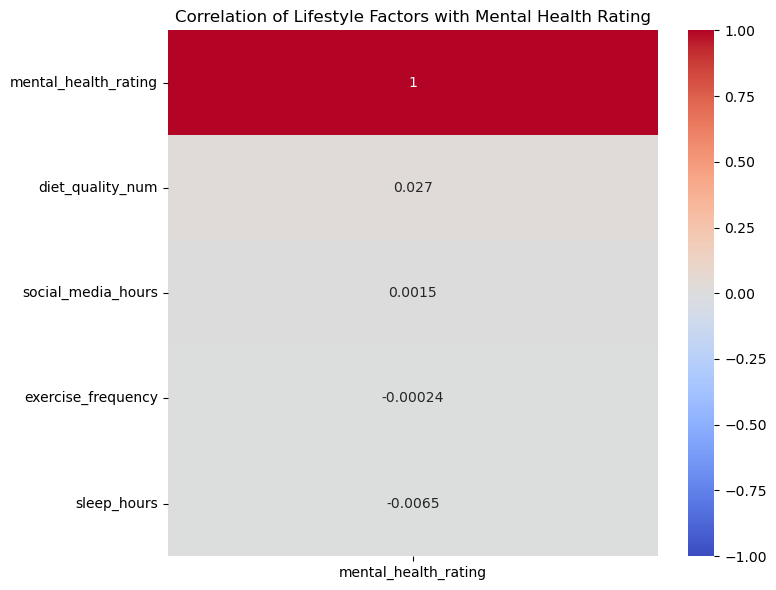

Correlation with mental health rating:
 mental_health_rating    1.000000
diet_quality_num        0.027362
social_media_hours      0.001496
exercise_frequency     -0.000242
sleep_hours            -0.006508
Name: mental_health_rating, dtype: float64 



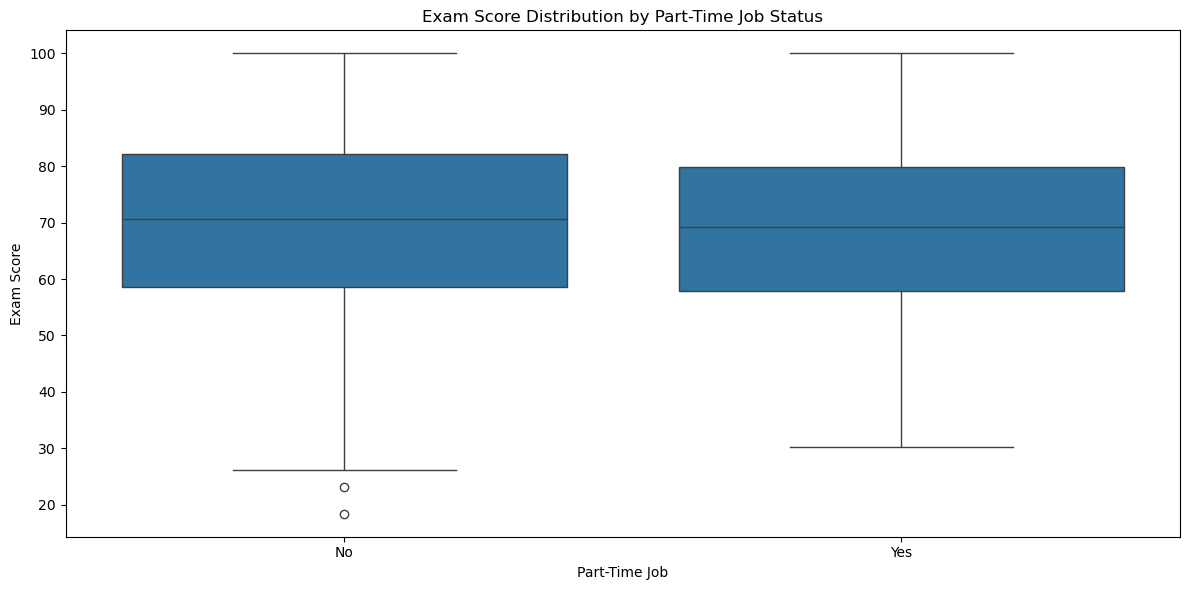

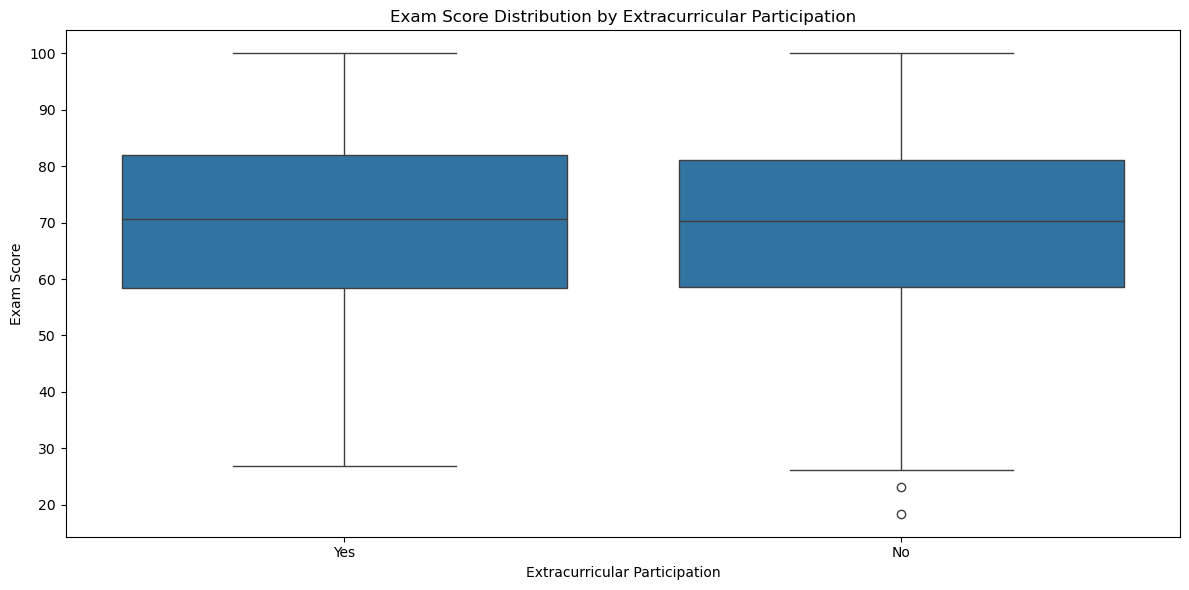

Average Exam Scores:
 extracurricular_participation     No    Yes
part_time_job                              
No                             69.69  70.14
Yes                            69.24  67.58


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("student_habits_performance.csv")

# Objective 1: Study Hours vs Exam Score
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='study_hours_per_day', y='exam_score', scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Study Hours per Day vs Exam Score')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.tight_layout()
plt.show()

correlation_study = df['study_hours_per_day'].corr(df['exam_score'])
print(f"Correlation between study hours and exam score: {correlation_study:.2f}\n")

# Objective 2: Lifestyle Factors vs Mental Health
diet_mapping = {'Poor': 1, 'Fair': 2, 'Good': 3}
df['diet_quality_num'] = df['diet_quality'].map(diet_mapping)

mental_health_factors = df[['sleep_hours', 'social_media_hours', 'exercise_frequency', 'diet_quality_num', 'mental_health_rating']]
correlation_matrix = mental_health_factors.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['mental_health_rating']].sort_values(by='mental_health_rating', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Lifestyle Factors with Mental Health Rating')
plt.tight_layout()
plt.show()

print("Correlation with mental health rating:\n", correlation_matrix['mental_health_rating'].sort_values(ascending=False), "\n")

# Objective 3: Exam Score vs Part-Time Job & Extracurricular Participation
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='part_time_job', y='exam_score')
plt.title('Exam Score Distribution by Part-Time Job Status')
plt.xlabel('Part-Time Job')
plt.ylabel('Exam Score')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='extracurricular_participation', y='exam_score')
plt.title('Exam Score Distribution by Extracurricular Participation')
plt.xlabel('Extracurricular Participation')
plt.ylabel('Exam Score')
plt.tight_layout()
plt.show()

grouped = df.groupby(['part_time_job', 'extracurricular_participation'])['exam_score'].mean().unstack()
print("Average Exam Scores:\n", grouped.round(2))
